In [28]:
# 在excel中输入数据，导入到程序中
import numpy as np
data = np.array(np.loadtxt('watermelon.csv', dtype=float, delimiter=',', skiprows=1, encoding='utf-8'))
x1, x2 = data[data[:,2]==0][:,:2], data[data[:,2]==1][:,:2]

In [29]:
# 计算样本均值
mean1 = np.mean(x1, axis=0)
mean2 = np.mean(x2, axis=0)

In [31]:
# 计算类内散度矩阵
Sw = np.dot((x1 - mean1).T, (x1 - mean1)) + \
     np.dot((x2 - mean2).T, (x2 - mean2))

In [33]:
# 计算Sw的逆，求权向量
w = np.dot(np.mat(Sw).I, mean1 - mean2)

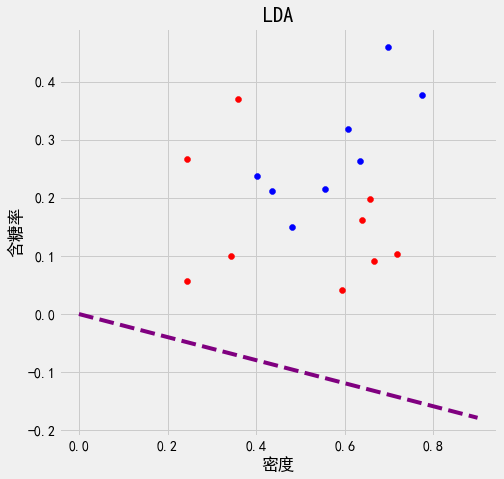

In [77]:
# 画图
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(7, 7))
ax.set(title="LDA",
       xlabel="密度",
       ylabel="含糖率")
ax.scatter(x1[:,0], x1[:,1], color='red')
ax.scatter(x2[:,0], x2[:,1], color='blue')

x = np.arange(0, 1, 0.1)
y = -w[0,0] * x / w[0,1]
ax.plot(x, y, 'r--', color ='purple')